## PREDICTING HOUSE PRICES USING ADVANCED REGRESSION

### PROBLEM STATEMENT

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">The problem will be addressed if we build predictive models using Advanced Regression Techniques and train the model and pick the best model using evaluators so that it can accurately predict the value of House price which is **SalePrice** - Target variable.</span>

### CLIENT

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Our Fictional Client is one of the **House Brokerage Firms** in Ames, Iowa looking to determine the exact house price by using our model predictions. Well! its very important to satisfy to the client requirements and hence a  best model should be built to predict house prices accurately. Let's dig in!</span>

### ABOUT THE DATASET

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">The dataset is obtained from Kaggle and it is a Competition Dataset which contains **79 features** which influences the price of Homes at Ames, Iowa. The competition organiser also boasts about the advantages of not just estimating house price using number of bedrooms or the fence around the house usually done by the brokers. Yeah, he is right, when you can accurately predict the house price using **Advanced Regression** techniques then why bother about a House Broker's price estimate?</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> We need a variety of pre-processing steps to deal with before dealing with the Big Picture (i.e) **Finding the Best Model**.
The below steps make sure that we are on track to achieve the prime target i.e Precicting the Sale
Price </span>

1. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Data Cleaning, Outlier Analysis and Exploratory Data Analysis</span>
2. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Use Heatmap and Correlation to find the Correlation among features</span>
3. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Analyze all the features and perform log transform for the skewed features</span>
4. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Data Visualization</span>
5. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Dummifying Categories and Finding Most Important Features</span>
6. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Model building including Lasso and Ridge Regression</span>
7. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Model Validation using plenty of good validators</span>
8. <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Conclusion by publishing the research, findings and result
</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
> “**People who work hard and people who work smart have different measures of success.”**-
*Jacob Morgan*</span>
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
It's all about the smart work we do to make our work easy. People say Mathematicians are usually lazy and find an easy way to solve a hard complex mathematical problem.Let's start doing the Smart Work!!</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">As usual we import all our basic libraries, scipy and 
plenty of model elements from scikit learn</span>

In [79]:
# Importing DataScience libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV, ElasticNetCV, LassoCV,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Lets's load the Train and Test/ Holdout set into a Pandas Dataframe. The key here is not to touch the Test/ Holdout set till the last and work with only the Train set</span>

In [2]:
# Reading csv file and making'Id' as Index
df_train = pd.read_csv('train.csv',index_col = 'Id')
df_test = pd.read_csv('test.csv',index_col = 'Id')

In [3]:
# Let's look at the top few rows
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# The rows and columns of our dataset 
df_train.shape

(1460, 80)

In [5]:
# Well we have to deal with plenty of attributes 
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
# Datatype of each attribute
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
# Descriptive Statistics of Numerical Variables
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Statistics of our Categorical variables
df_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


### MISSING DATA


* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Missing data is always a concern, you wonder everytime what happens to the missing values!</span>

* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Whether it was not entered during Data entry? </span> 

* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Whether it got missed during Data Imports/Exports? </span> 

* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Whatever maybe the reason we still can impute them.</span>

* <span style="color: black; font-family: Malgun Gothic; font-size: 14px;">First we check for the percentage of missing values in each fields and work each one seperately.</span>

In [9]:
# Checking for the Missing values
# Using isnull fuction to count the total null values in each field
total = df_train.isnull().sum().sort_values(ascending=False) 
# Percent of missing values is estimated by dividing total missing and the original total
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
# Concatenating the Total and Percent fields sing pandas concat fucntion
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Displays top 20 from our max sorted list
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Inserting "None" for the missing values for fields 
"PoolQC", "MiscFeature", "Alley", "Fence" and "FireplaceQu" since they are entered as NA which means its not present</span>

In [10]:
# Pandas fillna method to fill missing values with None
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'):
    df_train[col] = df_train[col].fillna('None')

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">For "LotFrontage", the area connected to the house is almost similiar when compared to the neighborhood and hence we fill the median for missing values</span>

In [11]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [12]:
# For loop to replace the missing data in the 4 attributes to None 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

In [13]:
# Filling 0 for GarageYrBlt since it depicts No Garage for missing values
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

In [14]:
# Filling with None since missing values means there is no Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Filling *0* for Masonary Veener Area because its NA and  Type as *None* meaning not present for these houses</span>

In [15]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Since the default functionality is **Typical** as per the metadata we can impute the missing values to be *Typ* </span>

In [16]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

In [17]:
# Imputing the most occuring field for Electrical since mostly all houses have Electricity
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> Double checking for missing values. Well, looks
like we are clean!!</span>

In [18]:
# Well! Things look better now! 
df_train.isnull().sum().max()

0

### OUTLIER ANALYSIS

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">To deal with Outlier is difficult since it varies with each attribute For example outliers are much used in Credit Card Fraud since they can show unusual patterns in the spending activity, eliminating them there is a really big blunder whereas in other areas such as our case it dosent make much sense since it makes our analysis difficult so in other cases such as ours its better to eliminate such unusual activity. Boxplot helps us a lot in finding Outliers in our case we use a Scatterplot to compare the SalePrice with Living Area</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Using Scatter plot and performing Bivariate analysis helps in finding outliers in our data. Below clearly there are two data points in GrLivArea which can be eliminated since for a Larger Area the SalePrice is unbelievably less!</span>

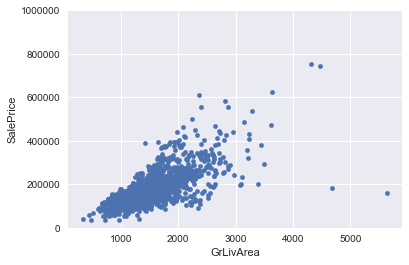

In [19]:
#Scatterplot of Area(sq ft) and SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# set ylimit to limit our data
data.plot.scatter(x=var, y='SalePrice', ylim=(0,1000000));

In [20]:
#Sorted descending to pick the values of GrLivArea for them to drop it
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 5642].index)
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 4676].index)

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">The plot below doesn't have our eliminated values, all 
good so far :) </span>

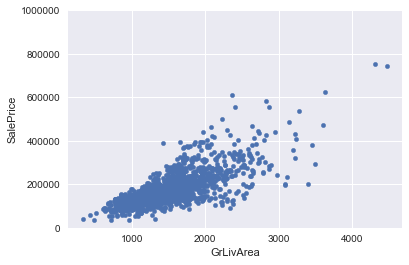

In [21]:
# Rechecking the plot after outlier elimination
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,1000000));

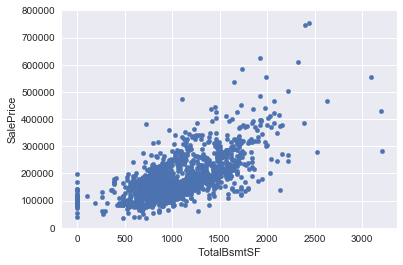

In [22]:
# Total sq feet of Basement area and SalePrice comparison
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Let's pick few features of our interest and apply them in a ParGrid to see what's going on! Well, SalesPrice has a strong positive relationship with the **OverallQual**,**GarageCars**,**FullBath**,**SalePrice** though there are some differences in space for Garage cars as the SalePrice goes down after 3 garages, that's interesting!</span>

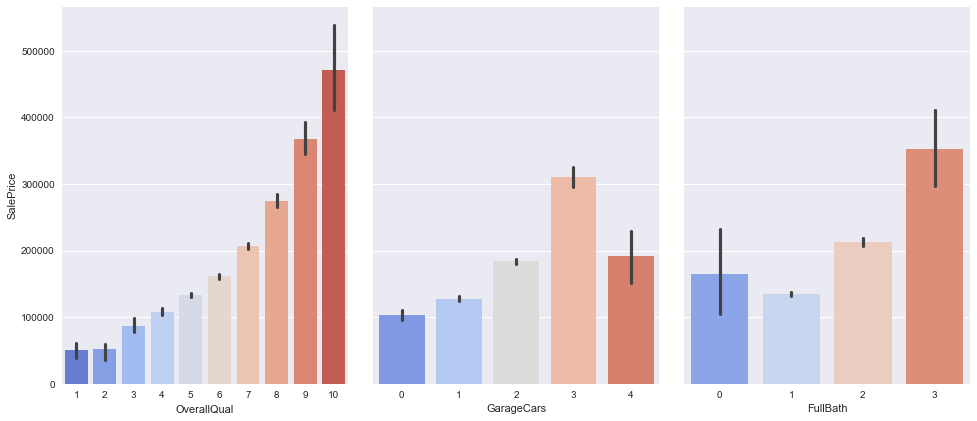

In [23]:
#Let's look at some more variables which affect/influence the Target variable
g = sns.PairGrid(df_train,
                 x_vars=['OverallQual','GarageCars','FullBath'],
                 y_vars=["SalePrice"],
                 aspect=.75, size=6)
#plt.xticks(rotation=90)
g.map(sns.barplot, palette="coolwarm");

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">**Pairplot** from Seaborn is a cool visualization to use since it brings all our important features of consideration in a single
plot, below we can see very nice positive correlations between Sales Price, Living Area, TotalBsmtSF and YearBuilt</span>

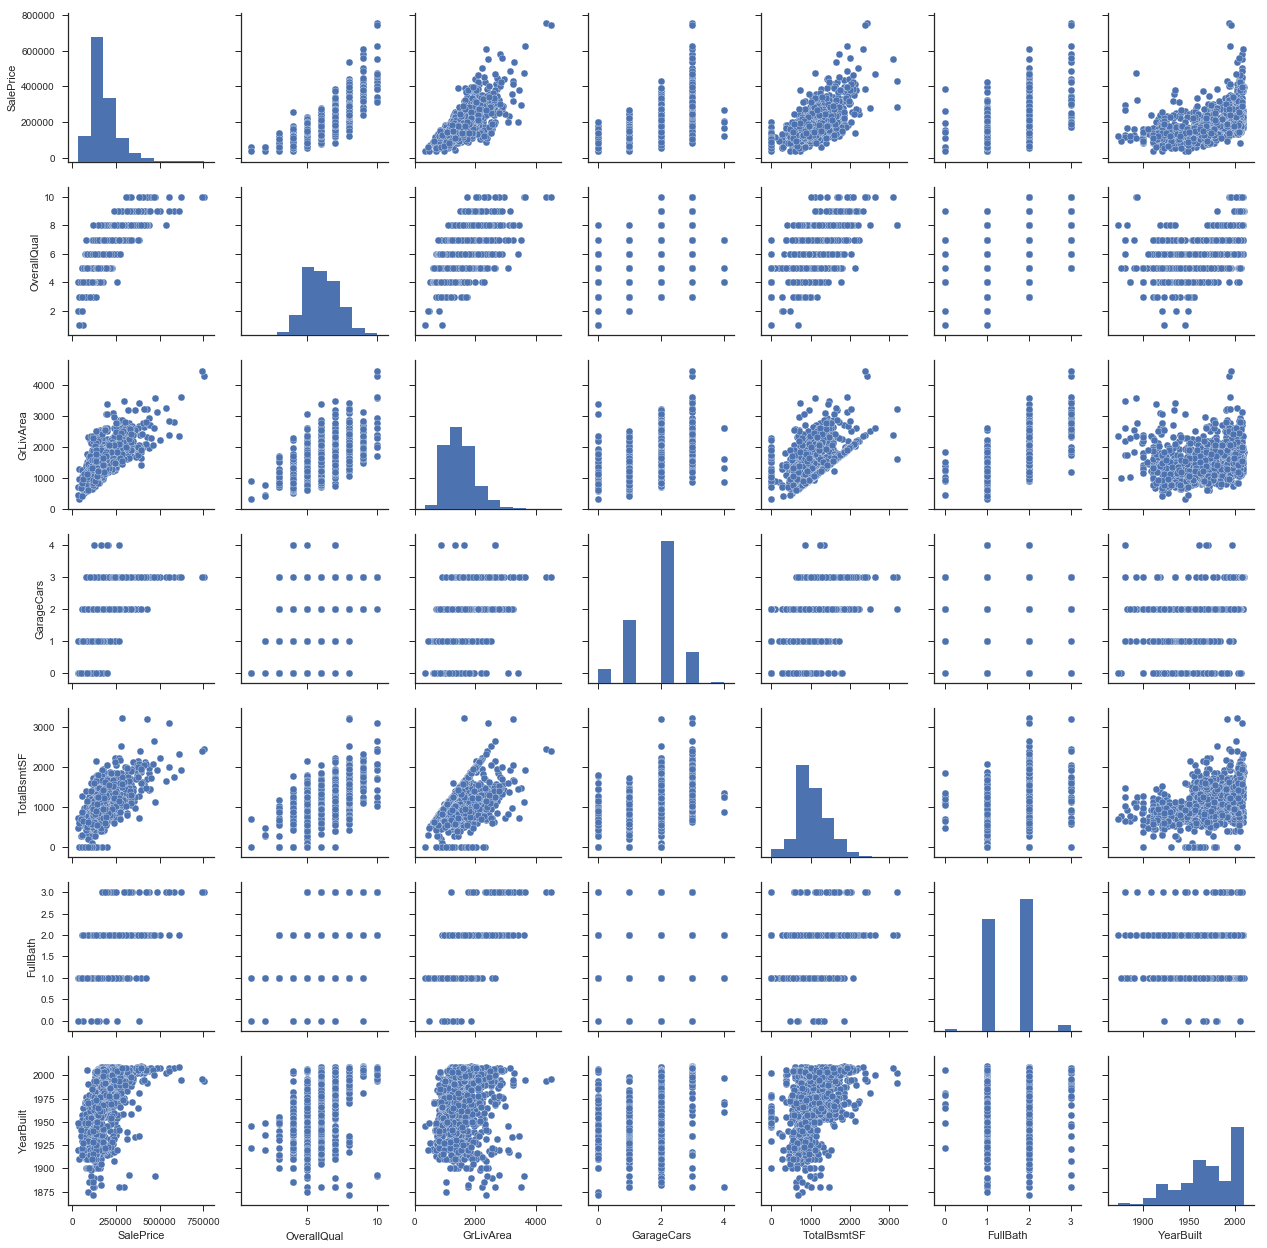

In [24]:
# seaborn pairplot
sns.set(style= 'ticks')
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

### OUR TARGET : SALEPRICE

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Our **Dependent Target Variable SalePrice** is plotted in a Histogram and it doesnt follow normal distribution but positively skewed
and the curve shows most SalePrice lies within \$150000-\$200000</span>

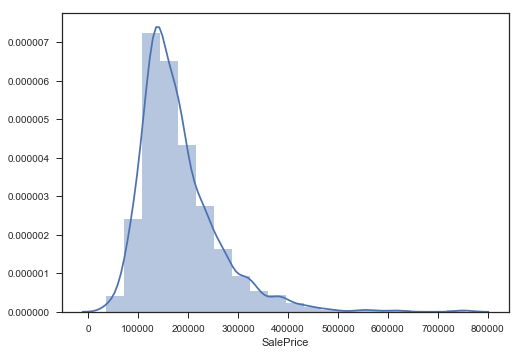

In [25]:
# Using Seaborn to create a distplot with 20 bins
sns.distplot(df_train['SalePrice'],bins = 20);

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Let's address our skewed target and normalize it using numpy log transformation!</span>


 mu = 12.02 and sigma = 0.40



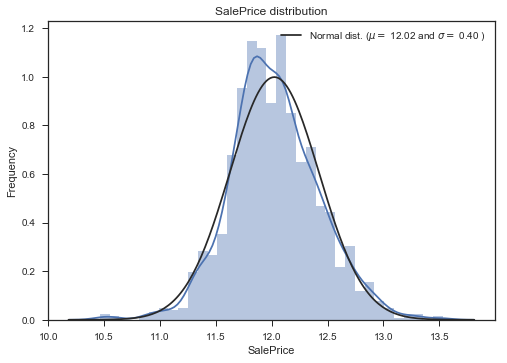

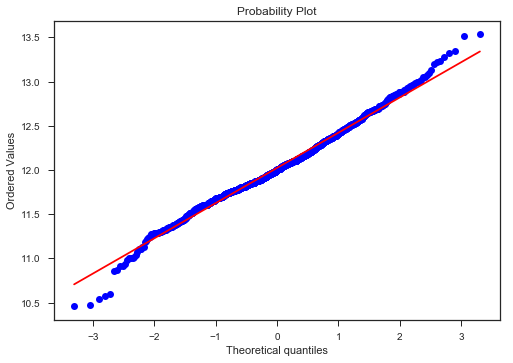

In [26]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">We have fixed the skewness problem now and the Target variable is normally distributed after the Log transformation!</span>

### CORRELATION & HEATMAP

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">A lot is happening with the Correlation heatmap below.Most important features determined by the positive Correlation score and OverallQuality seems to be the leader, obvious though!</span>

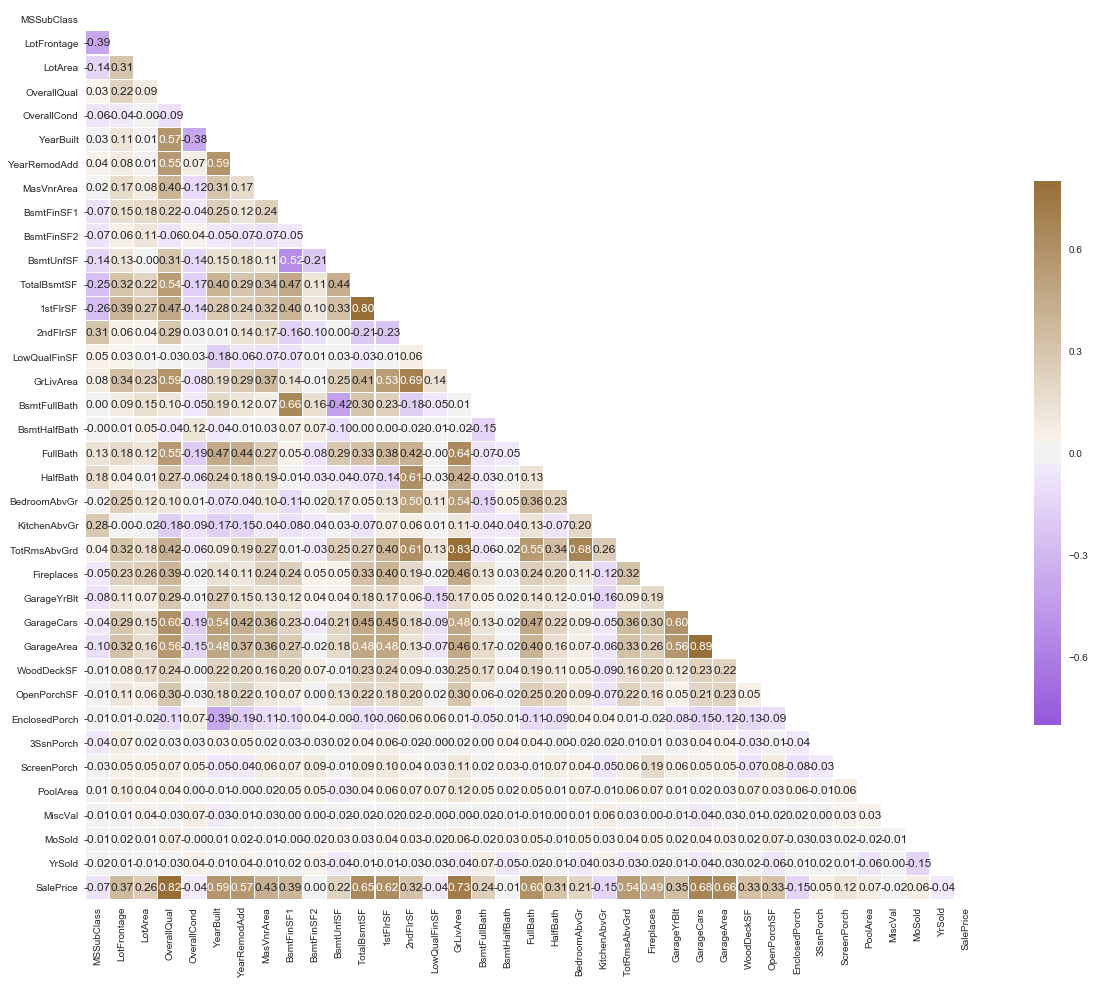

In [27]:
sns.set(style="white")
corr = df_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(1000, 50, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask,vmax =.8, cmap=cmap, center=0,fmt= '.2f',
            square=True, linewidths=.1, cbar_kws={"shrink": .5});

### FEATURE ENGINEERING

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">To get our features right and normally distributed solves most of the problem. Well, skewness is a issue to address here and the numeric features are filtered and applied the log transformation</span>

In [28]:
# Using datatype to seperate numerical features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Computing skewness using lambda function
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna()))
# Filtering highly skewed features
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

In [29]:
#Log transform to normalize skewed features
df_train[skewed_feats] = np.log1p(df_train[skewed_feats])

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">**Getting dummies for categorical variables**</span>

In [30]:
# pandas get_dummies function to convert categorical values into binary
df_train = pd.get_dummies(df_train)

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">**Formulating *X* and *y* arrays**</span>

In [31]:
# X array - drop target
X= df_train.drop(['SalePrice'],axis=1).values

In [32]:
# y array - target only
y=df_train['SalePrice'].values

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">** Making a Train Validate Split from Train**</span>

In [33]:
# Split Train into Train and Validate Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=42)

In [34]:
# Size of our newly split datasets 
print('Train size: %i' % X_train.shape[0])
print('Validation size: %i' % X_val.shape[0])

Train size: 1166
Validation size: 292


<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">**Function to return RMSE (Root Mean Squared Error)of our K-Fold Cross Validation**</span>

In [35]:
# No. of folds for Cross Validation
n_folds = 5
# Defining a function which returns the mean squared error between the cross validation score of X and y arrays
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model,X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">**CROSS VALIDATION**</span>

In [37]:
# Intialize the Cross Validation function with Shuffle
n_folds = 5
custom_cv = KFold(n_folds, shuffle=True, random_state=42)

### PREDCITIVE MODELS

<span style="color: black; font-family: Malgun Gothic; font-size: 16px;">**BASE MODEL : GRADIENT BOOSTING REGRESSOR**</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Let's start with the Gradient Boosting Regressor as our Base Model.GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.</span>

In [38]:
#define  our  GB model
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [39]:
#fitting he model on the train set
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=5,
             subsample=1.0, verbose=0, warm_start=False)

In [40]:
#Cross Validation Error
rmse_cv(GBR).mean()

0.11650232036055683

In [66]:
# R squared, RMSE and Mean Absolute Error obtained by using actual and predicted values from Validate set
print('Validation R^2: %.5f'  % r2_score(y_val,GBR.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,GBR.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,GBR.predict(X_val)))

Validation R^2: 0.91113
Validation RMSE: 0.12240

Validation Mean Absolute Error: 0.08178



<span style="color: black; font-family: Malgun Gothic; font-size: 16px;">**RIDGE WITH CV**</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Ridge regression with built-in cross-validation.
By default, it performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.</span>

In [42]:
# ridgecv model
ridgecv = RidgeCV(alphas=[0.1, 1.0, 10.0],cv =custom_cv)

In [43]:
#fitting our model on the training data
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0],
    cv=KFold(n_splits=5, random_state=42, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [44]:
# let's call our function to calculate the mean cross validation error
rmse_cv(ridgecv).mean()

0.11279364184220317

In [45]:
# R- squared, RMSE and Mean Absolute Error for the validation sets
print('Validation R^2: %.5f'  % r2_score(y_val,ridgecv.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,ridgecv.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,ridgecv.predict(X_val)))

Validation R^2: 0.91508
Validation RMSE: 0.11964

Validation Mean Absolute Error: 0.08349



<span style="color: black; font-family: Malgun Gothic; font-size: 16px;">**KERNEL RIDGE**</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.</span>

In [46]:
# kernel model
KRR = KernelRidge(alpha=5)

In [47]:
# fitting on train
KRR.fit(X_train,y_train)

KernelRidge(alpha=5, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [67]:
#  model estimatores
print('Validation R^2: %.5f'  % r2_score(y_val,KRR.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,KRR.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,KRR.predict(X_val)))

Validation R^2: 0.91660
Validation RMSE: 0.11857

Validation Mean Absolute Error: 0.08308



In [49]:
# CV error
rmse_cv(KRR).mean()

0.11253137406546218

<span style="color: black; font-family: Malgun Gothic; font-size: 16px;">**LASSO WITH CV**</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Lasso linear model with iterative fitting along a regularization path. The best model is selected by cross-validation.</span>

In [50]:
# define the model with alpha values in a numpy array with cross-validation function included
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005],cv =custom_cv)

In [51]:
# fit the model
lasso.fit(X_train,y_train)

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True,
    cv=KFold(n_splits=5, random_state=42, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [68]:
# Model scoring
print('Validation R^2: %.5f'  % r2_score(y_val,lasso.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,lasso.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,lasso.predict(X_val)))

Validation R^2: 0.92477
Validation RMSE: 0.11261

Validation Mean Absolute Error: 0.07891



In [53]:
#CV error
rmse_cv(lasso).mean()

0.11248187400252989

<span style="color: black; font-family: Malgun Gothic; font-size: 16px;">**ELASTIC NET WITH CV**</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Elastic Net model with iterative fitting along regularization path. The best model is selected by cross-validation.</span>

In [54]:
# defining the model with alphas and Elasticnet mixing parameter l1_ratio
Elastic = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000
                       ,cv=custom_cv)

In [55]:
# fit the model
Elastic.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=KFold(n_splits=5, random_state=42, shuffle=True), eps=0.001,
       fit_intercept=True, l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99],
       max_iter=5000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [69]:
# Model scores
print('Validation R^2: %.5f'  % r2_score(y_val,Elastic.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,Elastic.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,Elastic.predict(X_val)))

Validation R^2: 0.92451
Validation RMSE: 0.11281

Validation Mean Absolute Error: 0.07922



In [57]:
# CV error
rmse_cv(Elastic).mean()

0.1125955392791774

### PIPELINE 

<span style="color: black; font-family: Malgun Gothic; font-size: 16px;">**Pipeline with GridSearchCV**</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Pipeline of transforms with a final estimator.Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.GridSearch CV is an Exhaustive search over specified parameter values for an estimator with a built in Cross Validation.</span>

In [58]:
# import pipeline
from sklearn.pipeline import Pipeline
# initialize pipeline with the model and here we have function which takes cares of outlier
GBRPipe = Pipeline([
        ('outlier', RobustScaler()),
        ('gbm', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5))])

In [59]:
# set up the parameter grid with parameters you like to iterate on. Here we have 3
param_grid = {'gbm__learning_rate': [0.01, 0.05],
             'gbm__max_depth': [1,5],
             'gbm__min_samples_leaf': [10, 15]}
             

In [60]:
# setup gridsearchcv with estimator, param_grid
GBRGrid = GridSearchCV(estimator = GBRPipe,param_grid=param_grid)

In [62]:
GBRGrid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('outlier', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('gbm', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max...ors=3000, presort='auto', random_state=5,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gbm__learning_rate': [0.01, 0.05], 'gbm__max_depth': [1, 5], 'gbm__min_samples_leaf': [10, 15]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [63]:
rmse_cv(GBRGrid).mean()

0.11474244904968259

In [72]:
print('Validation R^2: %.5f'  % r2_score(y_val,GBRGrid.predict(X_val)))
print('Validation RMSE: %.5f\n'   % rmse(y_val,GBRGrid.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,GBRGrid.predict(X_val)))

Validation R^2: 0.90413
Validation RMSE: 0.12713

Validation Mean Absolute Error: 0.08405



### MODEL VALIDATION

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> We use the below three validators to pick our best
model and in addition to that we have built a predictor function to determine the Cross Validation Error using neg_mean_squared_error scoring which also is one of our important evaluators.</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 16px;">**R-SQUARED**</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 16px;">**RMSE (ROOT MEAN SQUARED ERROR)**</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Root Mean Square Error (RMSE) measures how much error there is between two data sets. In other words, it compares a predicted value and an observed or actual value.It’s also known as Root Mean Square Deviation and is one of the most widely used statistic</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 16px;">**MEAN ABSOLUTE ERROR**</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Mean absolute error (MAE) is a measure of difference between two continuous variables. Here X and y are arrays of paired observations that express the same phenomenon. Examples of Y versus X include comparisons of predicted versus actual and one technique of measurement versus an alternative technique of measurement.</span>

### BEST MODEL

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">The Best Model here is the LassoCV Regression which manages to produce a minimum cross validation error and highest R- squared and minimal RMSE and Mean Absolute Error. It performs so good that it overtakes even the Pipeline and GridSearch CV with hyperparameter function. Hence without any question we pick the Lasso Regression with Cross Validation as our Best Model</span>